# Preamble Code

### Imports

In [2]:
import platform
import sys
import tensorflow as tf

from importlib.metadata import version, PackageNotFoundError
from model_manager import ModelManager

### System Info

In [5]:
# Platform details
print(f"Platform: {platform.platform()}\n")

# Python version
print(f"Python version: {sys.version}\n")

# Check if TensorFlow is built with CUDA support
print(f"TensorFlow built with CUDA: {tf.test.is_built_with_cuda()}\n")

# List all available devices
devices = tf.config.list_physical_devices()
print("Available devices:")
for device in devices:
    print(device)

# Get detailed information about each device
for device in devices:
    print(f"\nDevice Name: {device.name}")
    details = tf.config.experimental.get_device_details(device)
    for key, value in details.items():
        print(f"{key}: {value}")

# Get installed requirement versions
with open("requirements.txt", "r") as file:
    requirements = file.readlines()
    print("\nRequired package versions:")
    for requirement in requirements:
        package_name = requirement.strip().split("==")[0]
        try:
            installed_version = version(package_name)
            print(f"{package_name}: {installed_version}")
        except PackageNotFoundError:
            print(f"{package_name} is not installed.")

Platform: Linux-6.6.87.2-microsoft-standard-WSL2-x86_64-with-glibc2.35

Python version: 3.11.9 (main, Apr 20 2024, 12:28:57) [GCC 11.4.0]

TensorFlow built with CUDA: True

Available devices:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

Device Name: /physical_device:CPU:0

Device Name: /physical_device:GPU:0
compute_capability: (8, 9)
device_name: NVIDIA GeForce RTX 4080

Required package versions:
tensorflow: 2.17.0
opencv-python: 4.10.0.84
scikit-learn: 1.5.2
albumentations: 1.4.18
matplotlib: 3.9.2
pydot  # install graphviz is not installed.
jupyterlab: 4.2.5
jupyter-resource-usage: 1.1.0


# Usage

In [ ]:
m = ModelManager(batch_size=4, augment_data=True)
# tf.keras.mixed_precision.set_global_policy('mixed_float16')

In [3]:
print('Backbones:', m.list_backbones())
print('Models:', m.list_models())

Backbones: ['resnet50', 'resnet101', 'mobilenet', 'mobilenetv2', 'efficientnetv2b0', 'efficientnetv2b1', 'efficientnetv2b2', 'efficientnetv2b3', 'efficientnetv2s', 'efficientnetv2m']
Models: ['unet', 'unet_plus_plus', 'unet_3plus', 'segnet', 'mask_rcnn', 'mask_rcnn_custom', 'linknet', 'deep_lab_v3']


In [7]:
# m.select_backbone()
m.select_backbone('efficientnetv2m')

In [8]:
# m.select_model('unet_not_augmented')
m.select_model('unet_plus_plus')

Reloaded model 'unet_plus_plus' with backbone 'efficientnetv2m'.


In [ ]:
# m.train(epochs=50)

In [6]:
# m.save_model()

In [4]:
# m.save_model_plot()

In [12]:
m.load_model()

Model Load Time: 4.5602 seconds


4.560215950012207

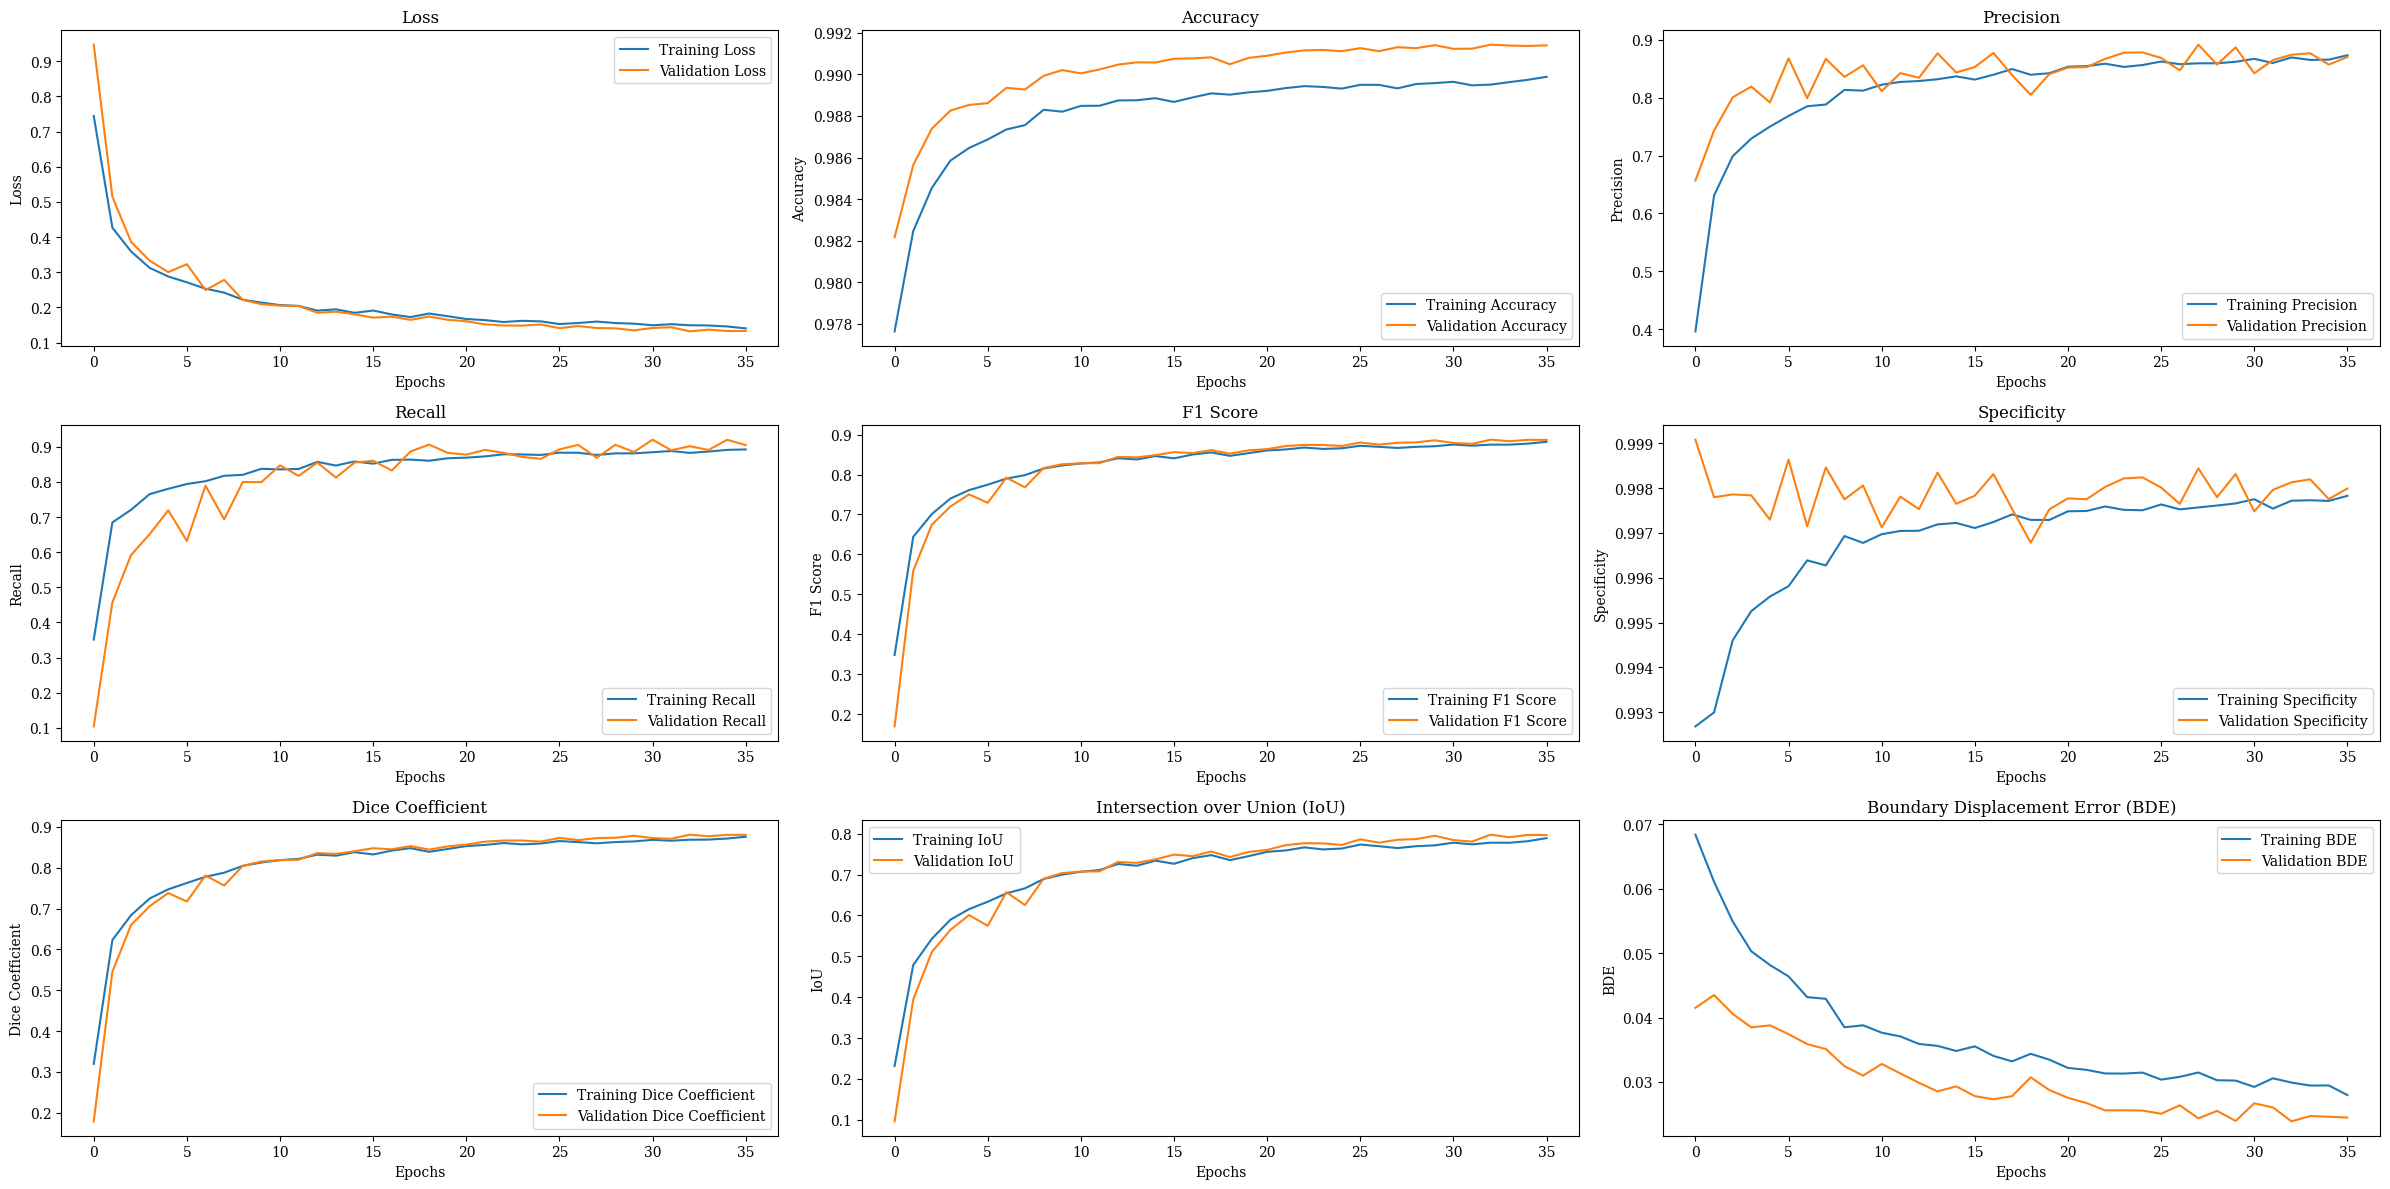

In [6]:
m.plot_metrics(save_plot_path="segmentation/results/results_metrics.png") # mask_rcnn_custom_efficientnetv2m

Inference Time: 0.2332 seconds
IoU Score: 0.6640


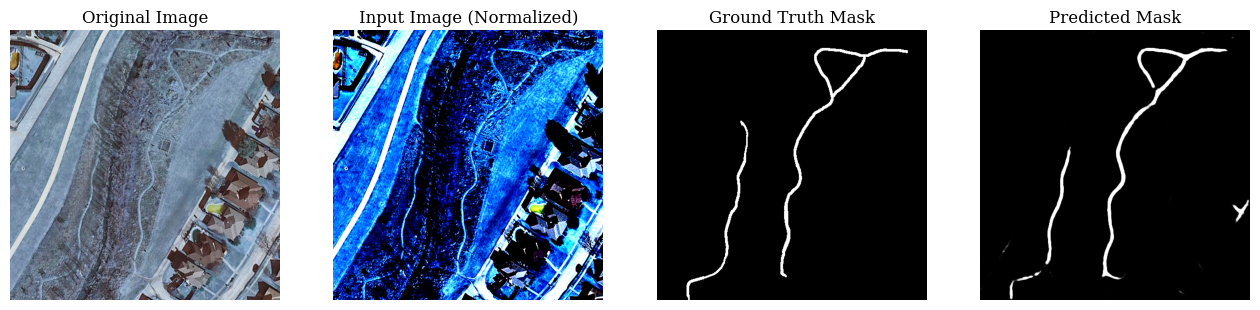

In [8]:
m.evaluate(3, 1, use_test_images=True, save_plot_path="segmentation/results/results1_linknet_resnet101.png") # (batch, index)
# m.evaluate(image_file="segmentation/test/images/1.png", mask_file="segmentation/test/masks/1.png") # Use image_file and mask_file for adhoc image eval
# m.evaluate(image_file="segmentation/test/test.png", mask_file="segmentation/test/masks/3.png")
# m.evaluate(image_file="segmentation/test/fragments_image.png", mask_file="segmentation/test/fragments_mask.png", save_mask_path="segmentation/test/fragments_prediction.png")

Inference Time: 0.0372 seconds
IoU Score: 0.6116


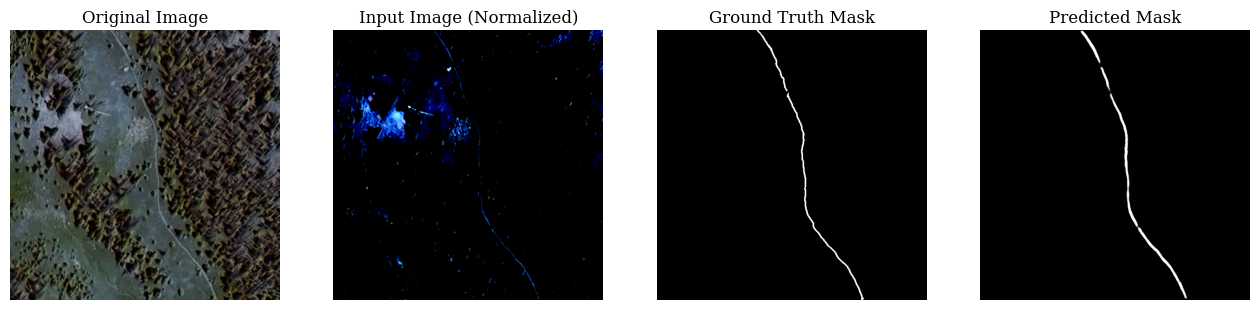

In [11]:
m.evaluate(1, 0, use_test_images=True, save_plot_path="segmentation/results/results2_linknet_resnet101.png")

Inference Time: 0.0888 seconds
IoU Score: 0.6223


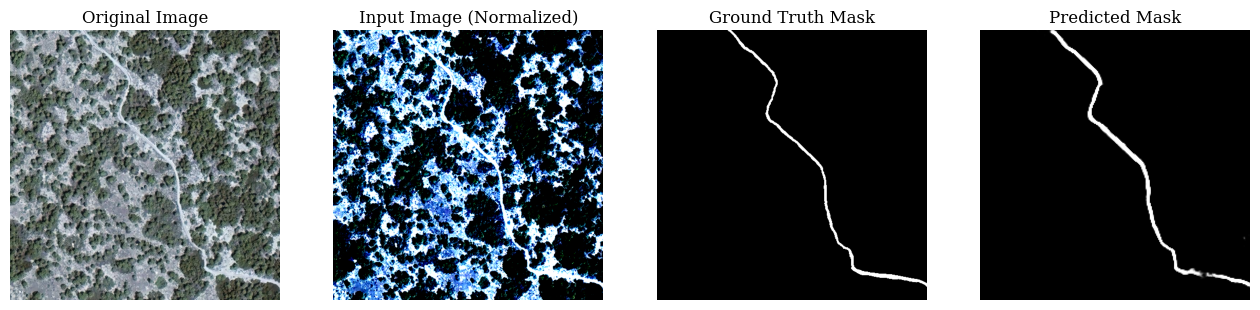

In [14]:
m.evaluate(3, 3, use_test_images=True, save_plot_path="segmentation/results/results3_unet_plus_plus_efficientnetv2m.png")

In [ ]:
for i in range(5):
    for j in range(4):
        m.evaluate(i, j, use_test_images=True)

In [ ]:
for model in m.list_models():
    m.select_model(model)
    for backbone in m.list_backbones():
        m.select_backbone(backbone)
        m.load_model()
        m.evaluate(3, 3, use_test_images=True)

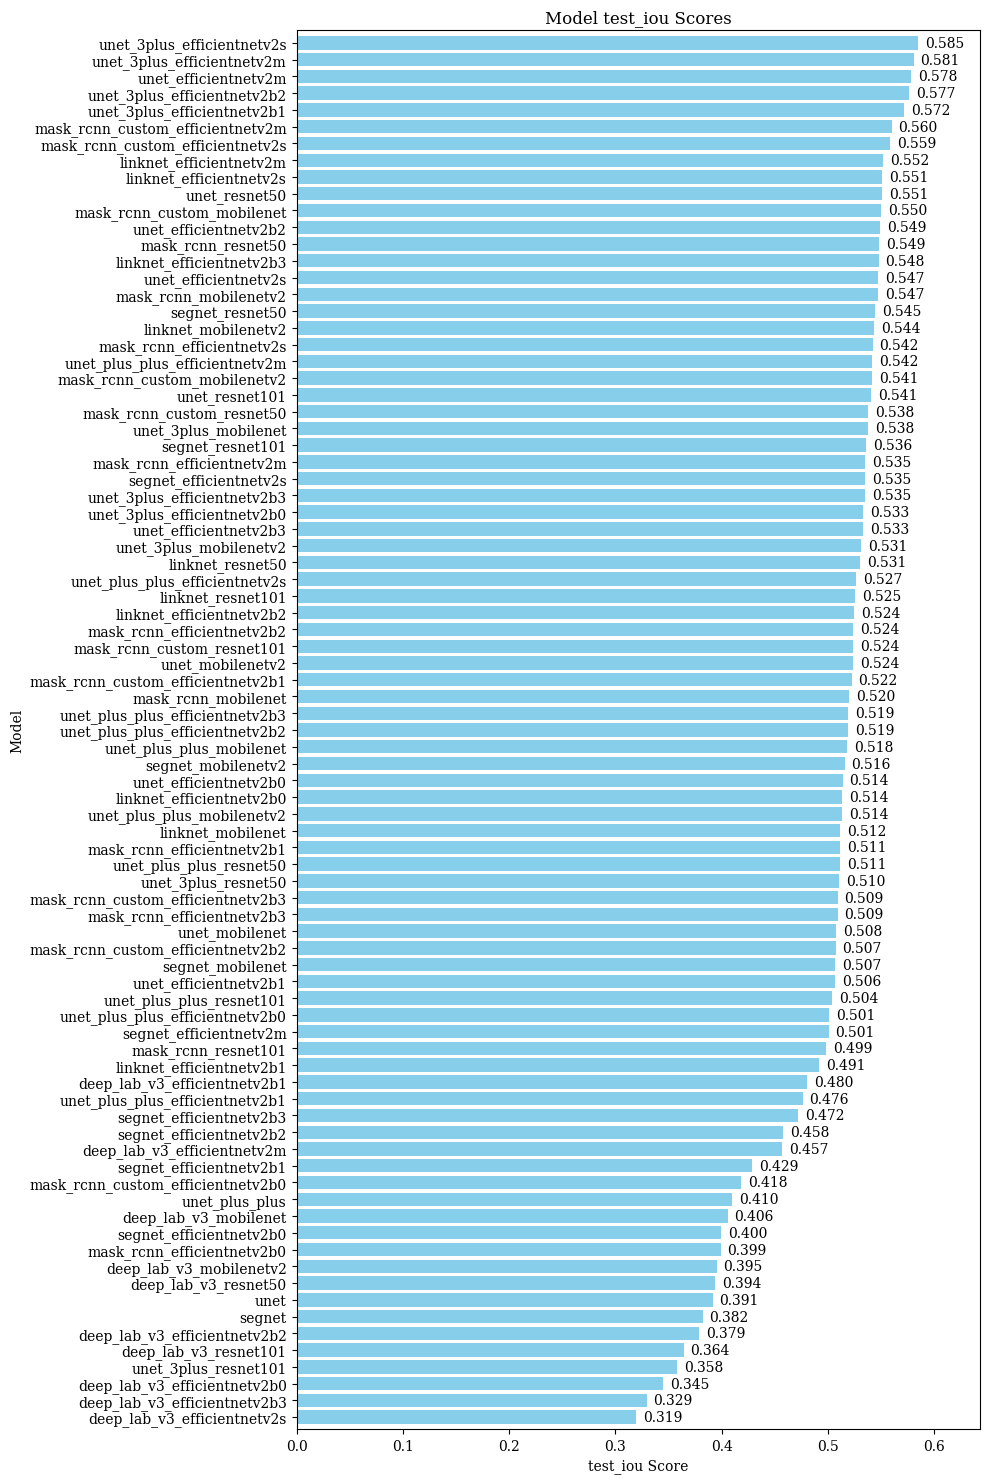

In [3]:
# m.plot_model_comparison(metric="val_iou")
# m.plot_model_comparison(metric="val_iou", model=["unet"])
# m.plot_model_comparison(metric="val_iou", model=["resnet50","resnet101"])

m.plot_model_comparison(metric="test_iou", save_plot_path="segmentation/results/results_all.png")
# m.plot_model_comparison(metric="test_iou", plot_best=True)
# m.plot_model_comparison(metric="test_iou", plot_best=True, save_plot_path="segmentation/results/results_best.png")
# m.plot_model_comparison(metric="test_iou", model=["unet"], compare_not_augmented=True, save_plot_path="segmentation/results/results_augmented.png")
# m.plot_model_comparison(metric="val_iou", model=["unet"], compare_not_augmented=True)

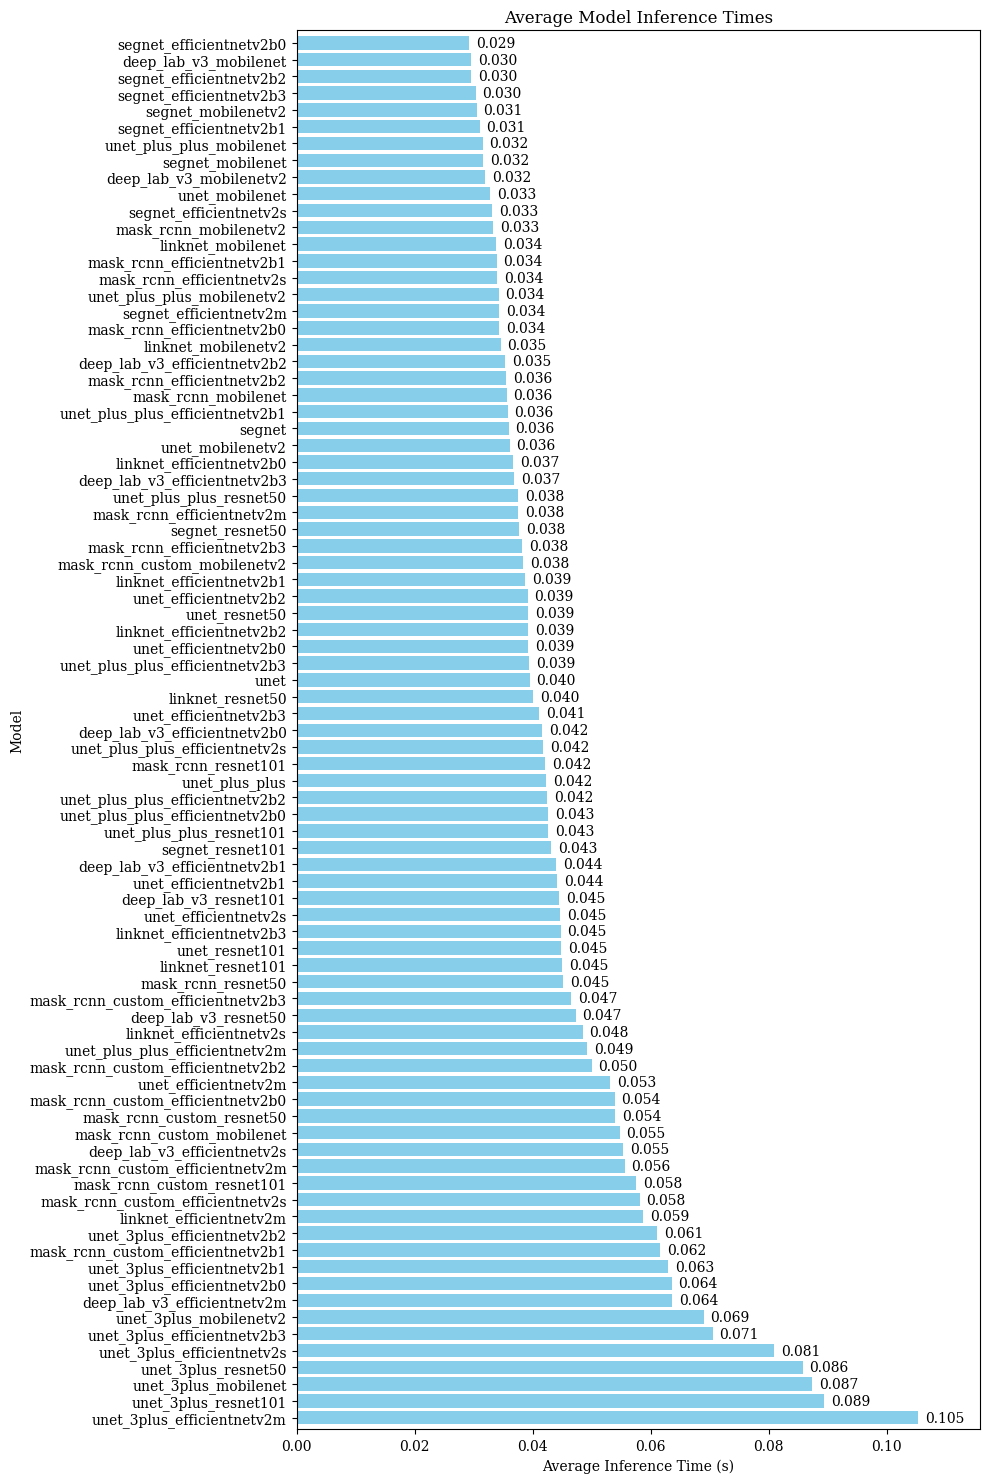

In [5]:
# m.plot_model_times(model="unet")
# m.plot_model_times(load_times_only=True, save_plot_path="segmentation/results/results_load_times.png")
m.plot_model_times(inference_times_only=True, save_plot_path="segmentation/results/results_inference_times.png")

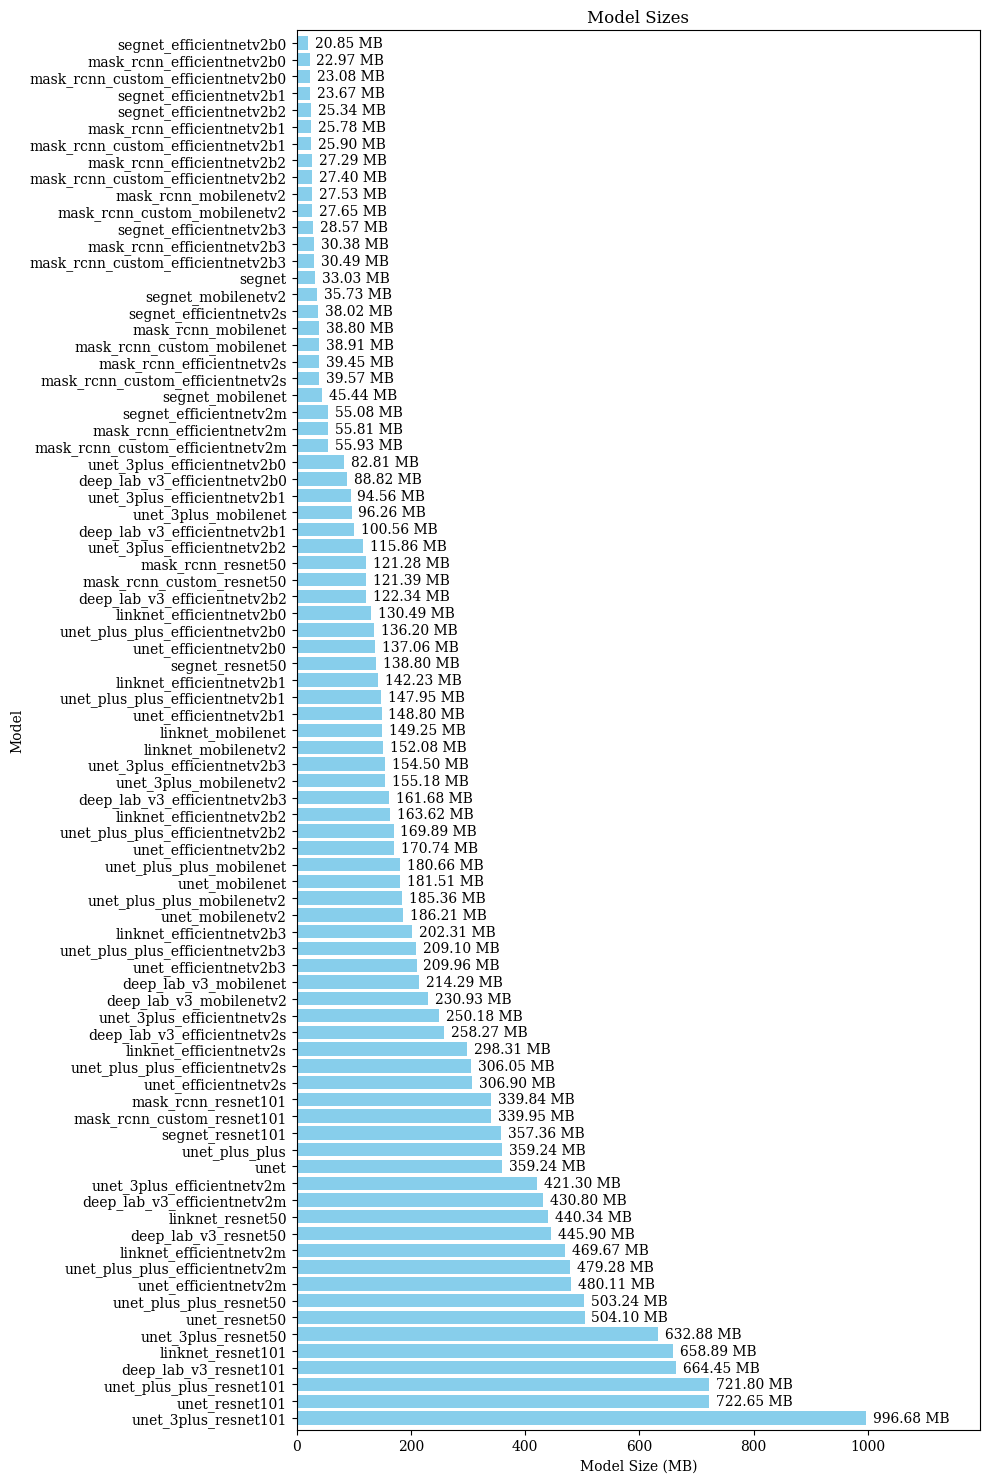

In [6]:
m.plot_model_size(save_plot_path="segmentation/results/results_model_sizes.png")
# m.plot_model_size(model="unet")

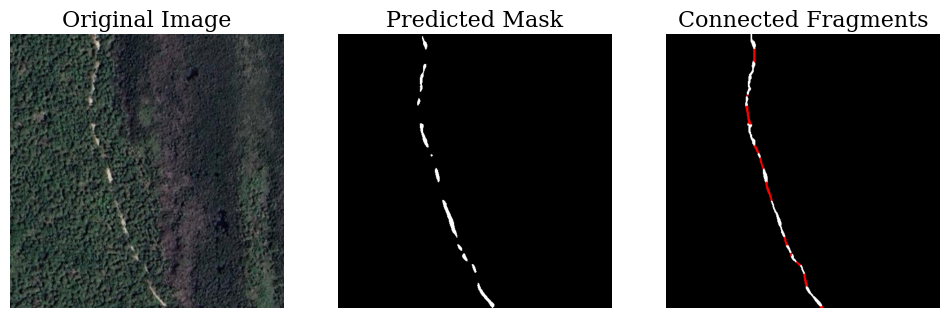

In [22]:
# Code to plot presentation images

import cv2
import matplotlib.pyplot as plt

original_image = cv2.imread("segmentation/test/fragments_image.png")
prediction = cv2.imread("segmentation/test/fragments_prediction.png", cv2.IMREAD_GRAYSCALE)
mask_joined = cv2.imread("segmentation/test/fragments_mask_joined.png")

plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.title("Original Image", fontsize=16)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Predicted Mask", fontsize=16)
plt.imshow(prediction, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Connected Fragments", fontsize=16)
plt.imshow(cv2.cvtColor(mask_joined, cv2.COLOR_BGR2RGB))
plt.axis("off")

# plt.subplot(1, 3, 1)
# plt.title("Original Image", fontsize=12, y=-0.1)
# plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
# plt.axis("off")

# plt.subplot(1, 3, 2)
# plt.title("Predicted Mask", fontsize=12, y=-0.1)
# plt.imshow(prediction, cmap="gray")
# plt.axis("off")

# plt.subplot(1, 3, 3)
# plt.title("Connected Fragments", fontsize=12, y=-0.1)
# plt.imshow(cv2.cvtColor(mask_joined, cv2.COLOR_BGR2RGB))
# plt.axis("off")

plt.savefig("segmentation/test/fragments_plot.png", bbox_inches="tight", pad_inches=0.1, dpi=150)
plt.show()

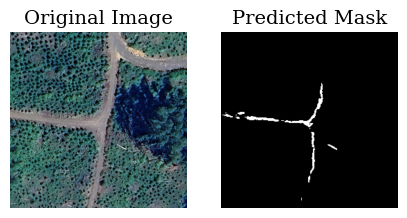

In [28]:
# Code to plot presentation images

import cv2
import matplotlib.pyplot as plt

original_image = cv2.imread("segmentation/test/dirt_road_image.png")
prediction = cv2.imread("segmentation/test/dirt_road_prediction.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image", fontsize=14)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Predicted Mask", fontsize=14)
plt.imshow(prediction, cmap="gray")
plt.axis("off")

# plt.subplot(1, 2, 1)
# plt.title("Original Image", fontsize=10, y=-0.14)
# plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
# plt.axis("off")

# plt.subplot(1, 2, 2)
# plt.title("Predicted Mask", fontsize=10, y=-0.14)
# plt.imshow(prediction, cmap="gray")
# plt.axis("off")

plt.savefig("segmentation/test/dirt_road_plot.png", bbox_inches="tight", pad_inches=0.1, dpi=200)
plt.show()

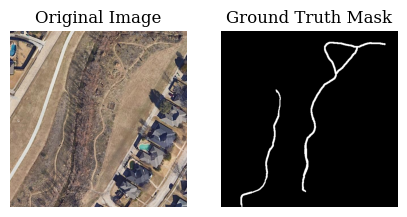

In [29]:
# Code to plot presentation images

import cv2
import matplotlib.pyplot as plt

original_image = cv2.imread("segmentation/test/images/3.png")
ground_truth = cv2.imread("segmentation/test/masks/3.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image", fontsize=12)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Ground Truth Mask", fontsize=12)
plt.imshow(ground_truth, cmap="gray")
plt.axis("off")

plt.savefig("segmentation/results/original_vs_mask_plot.png", bbox_inches="tight", pad_inches=0.1, dpi=200)
plt.show()

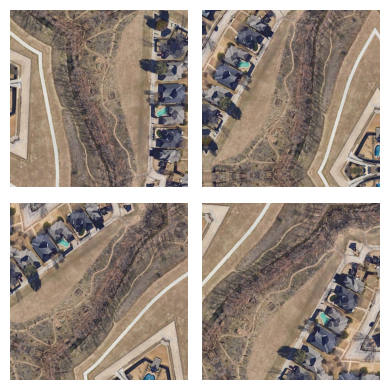

In [20]:
# Code to plot presentation images

import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
import cv2

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=45, p=0.5),
    A.Normalize(mean=mean, std=std),
])

image = cv2.imread('segmentation/test/images/3.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(2, 2, figsize=(4, 4))

for i in range(2):
    for j in range(2):
        augmented = transform(image=image)['image']
        augmented = (augmented * std + mean) * 255
        augmented = np.clip(augmented, 0, 255).astype(np.uint8)
        axes[i, j].imshow(augmented)
        axes[i, j].axis('off')

plt.tight_layout()
plt.savefig("segmentation/results/augmentation_plot.png", bbox_inches="tight", pad_inches=0.1, dpi=200)
plt.show()